# Section 35 Part 3 Decision Tree Random Forrest

#### Lecture 214 The Main Idea
#### Lecture 215 Giri Impurity and Entrophy:  A Conceprual Overvie
#### Lecture 216 Breast Cancer Prediction:  Decision Trees
#### Lecture 217 Breast Cancer Prediction:  Random Forest

###### Lecture 216 breast Cancer Prediction with Dexision Trees

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [9]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
y.sample(10)

71     1
4      0
109    1
455    1
328    0
555    1
37     1
247    1
99     0
480    1
Name: target, dtype: int32

In [13]:
y.value_counts()
# 1 is malignant, 0 benign

target
1    357
0    212
Name: count, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

##### Decision Tree Classification:

In [14]:
tree = DecisionTreeClassifier()

In [15]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
tree.score(X_train, y_train)
# Result of 1 suggests data is overfit.

1.0

In [18]:
tree.score(X_test, y_test)

0.9230769230769231

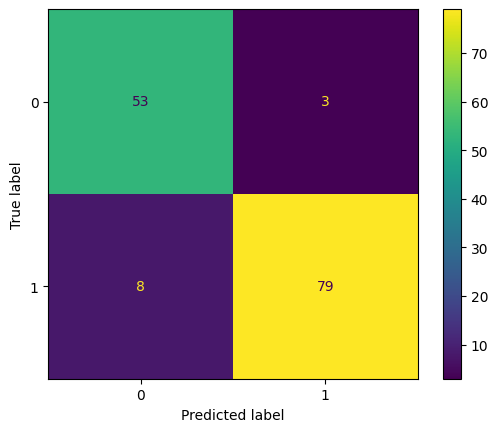

In [21]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test).figure_.savefig(r'output/conf_mat_tree.png')
# I am getting different results than the tutor on this run; my data seems to have split differently than his.

###### Using Random Forest:

In [6]:
forest = RandomForestClassifier()

In [7]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
forest.score(X_train, y_train)
# Again seems to be overfit.

1.0

In [25]:
forest.score(X_test, y_test)

0.9790209790209791

In [26]:
forest.n_features_in_

30